<a href="https://colab.research.google.com/github/jjlizcano/Sistema-recomendaciones-cultivo/blob/main/notebooks/Primera_entrega_proyecto_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sistema de recomendaciones de cultivos**


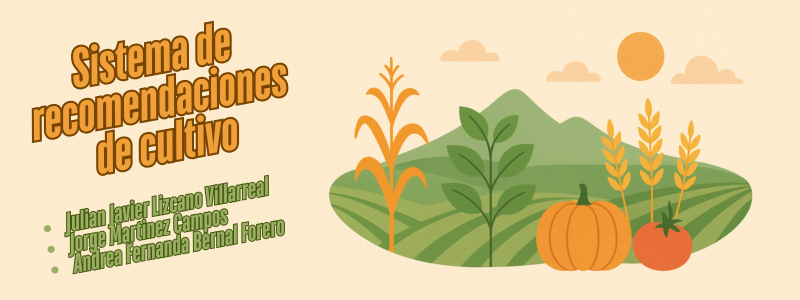

In [ ]:
# 1. Instalar dependencias adicionales
!pip install gdown seaborn --quiet

# 2. Clonar o actualizar el repositorio
import os

REPO_URL = "https://github.com/jjlizcano/Sistema-recomendaciones-cultivo.git"
REPO_DIR = "Sistema-recomendaciones-cultivo"

if not os.path.exists(REPO_DIR):
    !git clone {REPO_URL}
else:
    %cd {REPO_DIR}
    !git pull
    %cd ..

print("Repositorio listo en:", REPO_DIR)

Cloning into 'Sistema-recomendaciones-cultivo'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 573.98 KiB | 7.09 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Repositorio listo en: Sistema-recomendaciones-cultivo


In [ ]:
# 3. Semilla reproducible
import numpy as np, random

SEED = 42
np.random.seed(SEED)
random.seed(SEED)

In [ ]:
# 4. Verificar entorno
import sys, pandas as pd

print("Python:", sys.version)
print("Pandas:", pd.__version__)
print("Numpy:", np.__version__)

Python: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
Pandas: 2.2.2
Numpy: 2.0.2


In [ ]:
# 5. Cargar dataset desde /data
csv_path = f"{REPO_DIR}/data/FAOSTAT_data_en_9-1-2025.csv"

try:
    df = pd.read_csv(csv_path)
    print("Dataset cargado correctamente")
    print("Registros en el dataset:", len(df))

except FileNotFoundError:
    print(f" Error: No se encontró el archivo {csv_path}")

Dataset cargado correctamente
Registros en el dataset: 29272


# 1. **Exploración inicial del dataset: dimensiones, variables y vista preliminar**



In [ ]:
# === Punto 1 ===
# === Shape del DataFrame ===
print("\n=== Shape del DataFrame ===")
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# === Columnas del DataFrame ===

print("\n=== Columnas del DataFrame ===")
print("Las columnas son:")
for column in df.columns:
    print(f" - {column}")

# === Primeras 5 filas del DataFrame ===

print("\n=== Primeras 5 filas del DataFrame ===")
print(display(df.head()))

# === Tipos de variables ===

print("\n === Tipos de variables ===")
print("Los tipos de variables son:")
print(display(df.dtypes))


=== Shape del DataFrame ===
El dataset tiene 29272 filas y 15 columnas.

=== Columnas del DataFrame ===
Las columnas son:
 - Domain Code
 - Domain
 - Area Code (M49)
 - Area
 - Element Code
 - Element
 - Item Code (CPC)
 - Item
 - Year Code
 - Year
 - Unit
 - Value
 - Flag
 - Flag Description
 - Note

=== Primeras 5 filas del DataFrame ===


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371.0,"Almonds, in shell",2023,2023,ha,37000.0,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371.0,"Almonds, in shell",2023,2023,kg/ha,1810.8,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371.0,"Almonds, in shell",2023,2023,t,67000.0,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2023,2023,ha,25439.0,E,Estimated value,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2023,2023,kg/ha,704.0,E,Estimated value,NaN


None

 === Tipos de variables ===
Los tipos de variables son:


,0
Domain Code,object
Domain,object
Area Code (M49),int64
Area,object
Element Code,int64
Element,object
Item Code (CPC),float64
Item,object
Year Code,int64
Year,int64


None


# 2. **Análisis descriptivo de variables mediante *describe()***  

In [ ]:
from IPython.display import display

# --- Reclasificación rápida ---
df['Year'] = df['Year'].astype('Int64')
df['Value'] = df['Value'].astype(float)

cat_cols = [
    'Domain Code','Domain','Area Code (M49)','Area',
    'Element Code','Element','Item Code (CPC)','Item',
    'Unit','Flag','Flag Description','Note'
]
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].astype('category')

print(" Resumen de variables numéricas")
display(df.describe().T.round(2))

print("\n Resumen de variables categóricas")
display(df.describe(include=['category']).T)

 Resumen de variables numéricas


,count,mean,std,min,25%,50%,75%,max
Year Code,29272.0,2023.0,0.0,2023.0,2023.0,2023.0,2023.0,2023.0
Year,29272.0,2023.0,0.0,2023.0,2023.0,2023.0,2023.0,2023.0
Value,28357.0,478813.812892,7854987.90734,0.0,1000.0,6087.0,30393.75,782585836.0



 Resumen de variables categóricas


,count,unique,top,freq
Domain Code,29272,1,QCL,29272
Domain,29272,1,Crops and livestock products,29272
Area Code (M49),29272,200,159,369
Area,29272,200,China,369
Element Code,29272,3,5510,10161
Element,29272,3,Production,10161
Item Code (CPC),29272.0,161.0,1290.9,567.0
Item,29272,161,"Other vegetables, fresh n.e.c.",567
Unit,29272,3,t,10161
Flag,29272,5,A,13427


# 3. **Limpieza de datos**

In [ ]:
# 0)Copia de trabajo
df_reduced = df.copy()

# 1)Columnas redundantes / IDs
drop_cols = [
    'Domain Code',      # constante
    'Domain',           # constante
    'Year',             # todos los datos o filas son del año 2023
    'Year Code',        # duplicado de 'Year'
    'Note',             # vacío
    'Area Code (M49)',  # ID redundante
    'Element Code',     # ID redundante
    'Item Code (CPC)',  # ID redundante
    'Flag'              # nos quedamos solo con Flag Description
]

# 2)Eliminar
drop_cols = [c for c in drop_cols if c in df_reduced.columns]
df_reduced = df_reduced.drop(columns=drop_cols, errors='ignore')

# 3) Reporte breve
print("Columnas eliminadas:", drop_cols if drop_cols else "Ninguna")
print("Shape antes:", df.shape, "→ después:", df_reduced.shape)

# 4) Vista rápida del resultado
display(df_reduced.head(10))

Columnas eliminadas: ['Domain Code', 'Domain', 'Year', 'Year Code', 'Note', 'Area Code (M49)', 'Element Code', 'Item Code (CPC)', 'Flag']
Shape antes: (29272, 15) → después: (29272, 6)


,Area,Element,Item,Unit,Value,Flag Description
0,Afghanistan,Area harvested,"Almonds, in shell",ha,37000.00,Official figure
1,Afghanistan,Yield,"Almonds, in shell",kg/ha,1810.80,Official figure
2,Afghanistan,Production,"Almonds, in shell",t,67000.00,Official figure
3,Afghanistan,Area harvested,"Anise, badian, coriander, cumin, caraway, fenn...",ha,25439.00,Estimated value
4,Afghanistan,Yield,"Anise, badian, coriander, cumin, caraway, fenn...",kg/ha,704.00,Estimated value
5,Afghanistan,Production,"Anise, badian, coriander, cumin, caraway, fenn...",t,17908.59,Estimated value
6,Afghanistan,Area harvested,Apples,ha,31000.00,Official figure
7,Afghanistan,Yield,Apples,kg/ha,10451.60,Official figure
8,Afghanistan,Production,Apples,t,324000.00,Official figure
9,Afghanistan,Area harvested,Apricots,ha,22008.00,Imputed value


## 3.1. **Contexto después de la limpieza**

Tras realizar la primera limpieza del dataset (eliminación de columnas redundantes como códigos, notas y años duplicados), el archivo quedó reducido a seis columnas principales, cada una con un rol específico:

- ***Area*** → representa el país al que pertenece el registro.

- ***Element*** → indica el tipo de información reportada, que puede ser Producción, Rendimiento o Superficie cosechada.

- ***Item*** → corresponde al cultivo específico al que se refiere el registro (ejemplo: arroz, maíz, trigo).

- ***Unit*** → define la unidad de medida en que se expresa el valor, como toneladas, hectáreas o kg/ha.

- ***Value*** → es el dato numérico asociado al elemento, expresado en la unidad correspondiente.

- ***Flag Description*** → señala la calidad o naturaleza del dato, por ejemplo Official figure o Estimated value.

Al observar la estructura en este punto, notamos que la información aún estaba organizada de manera que cada fila contenía un único “Elemento” dentro de la columna *Element*.

Esto significa que, para un mismo país y cultivo, aparecían varias filas distintas:

- Una con la **superficie cosechada (Area harvested)** en hectáreas.

- Otra con el **rendimiento (Yield)** en kg/ha.

- Otra con la **producción (Production)** en toneladas.

En otras palabras, la variable *Value* estaba compartida entre distintos tipos de datos, lo que hacía que los registros estuvieran fragmentados.

In [ ]:
# Partimos de d (ya filtrado por unidad-canónica por Element) o de df_reduced si vienes de antes:
d = df_reduced.copy()

# Limpieza mínima
text_cols = ['Area','Item','Element','Unit','Flag Description']
for c in text_cols:
    if c in d.columns:
        d[c] = d[c].astype('string').str.strip()
d['Value'] = pd.to_numeric(d['Value'], errors='coerce')

# Unidad canónica por Element y filtrado (evita mezclar ej. kg/ha vs hg/ha)
unit_mode = d.groupby('Element')['Unit'].agg(lambda s: s.mode().iat[0] if not s.mode().empty else s.iloc[0])
d = d[d['Unit'] == d['Element'].map(unit_mode)].copy()

# (A) Agregamos para resolver duplicados por (Area, Item, Element)
agg = d.groupby(['Area','Item','Element'], as_index=False, dropna=False).agg(
    Value=('Value','mean'),
    Flag=('Flag Description', lambda s: s.mode().iat[0] if not s.mode().empty else s.iloc[0])
)

# (B) Nombramos columnas numéricas con Element + unidad
agg['Element'] = agg['Element'] + " (" + agg['Element'].map(unit_mode) + ")"

# (C) Pivot SOLO de valores -> crea las 3 columnas numéricas
wide = agg.pivot(index=['Area','Item'], columns='Element', values='Value').reset_index()

# (D) Un único Flag por (Area, Item): moda entre los flags de sus Elements
flags = agg.groupby(['Area','Item'], as_index=False)['Flag'] \
           .agg(lambda s: s.mode().iat[0] if not s.mode().empty else s.iloc[0])

# (E) Unimos el Flag consolidado y rellenamos valores numéricos NaN -> 0
wide = wide.merge(flags, on=['Area','Item'], how='left')
num_cols = wide.select_dtypes(include='number').columns
wide[num_cols] = wide[num_cols].fillna(0)

# (F) Orden limpio de columnas
num_cols = [c for c in wide.columns if c not in ['Area','Item','Flag']]
wide = wide[['Area','Item'] + num_cols + ['Flag']]

df_final = wide.copy()

print("Unidades por Element elegidas:", unit_mode.to_dict())
print("Shape final:", df_final.shape)
display(df_final.head(10))

Unidades por Element elegidas: {'Area harvested': 'ha', 'Production': 't', 'Yield': 'kg/ha'}
Shape final: (10202, 6)


,Area,Item,Area harvested (ha),Production (t),Yield (kg/ha),Flag
0,Afghanistan,"Almonds, in shell",37000.0,67000.00,1810.8,Official figure
1,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",25439.0,17908.59,704.0,Estimated value
2,Afghanistan,Apples,31000.0,324000.00,10451.6,Official figure
3,Afghanistan,Apricots,22008.0,155429.38,7062.4,Imputed value
4,Afghanistan,Barley,80000.0,110000.00,1375.0,Figure from international organizations
5,Afghanistan,Cantaloupes and other melons,73628.0,795100.45,10798.9,Imputed value
6,Afghanistan,Figs,10228.0,60651.09,5929.9,Estimated value
7,Afghanistan,Grapes,93000.0,1086000.00,11677.4,Official figure
8,Afghanistan,Linseed,35000.0,29000.00,828.6,Official figure
9,Afghanistan,Maize (corn),127000.0,363000.00,2858.3,Official figure


Para poder analizar y comparar correctamente la información, fue indispensable recrear el dataframe en un formato más claro. Con este cambio:

- Cada país y cultivo queda representado en una sola fila.

- En lugar de tener una columna genérica Value, ahora existen tres columnas numéricas diferenciadas:

  - *Area harvested (ha)*

  - *Production (t)*

  - *Yield (kg/ha)*

- Se consolidó además un único Flag por fila, que resume la calidad de los datos reportados (*Official figure, Estimated value*, etc.).

Este paso garantiza que los datos puedan ser descritos, visualizados y utilizados sin confusión por mezclas de unidades o duplicación de filas.

In [ ]:
# 1. Resumen de variables numéricas finales
print("Resumen de variables numéricas")
num_desc = df_final.select_dtypes(include='number').describe().T.round(2)
display(num_desc)

# 2. Resumen de variables categóricas finales
print("\nResumen de variables categóricas")
cat_desc = df_final[['Area','Item','Flag']].describe().T
display(cat_desc)

Resumen de variables numéricas


,count,mean,std,min,25%,50%,75%,max
Area harvested (ha),10202.0,163925.00,1426790.97,0.0,158.25,2325.00,20000.00,47828000.0
Production (t),10202.0,1155731.62,12990366.08,0.0,720.54,12985.88,125487.32,782585836.0
Yield (kg/ha),10202.0,11231.76,25032.59,0.0,1099.32,4566.90,13039.35,635925.4



Resumen de variables categóricas


,count,unique,top,freq
Area,10202,200,China,125
Item,10202,161,"Other vegetables, fresh n.e.c.",193
Flag,10202,5,Official figure,4552


# **4. Graficas**

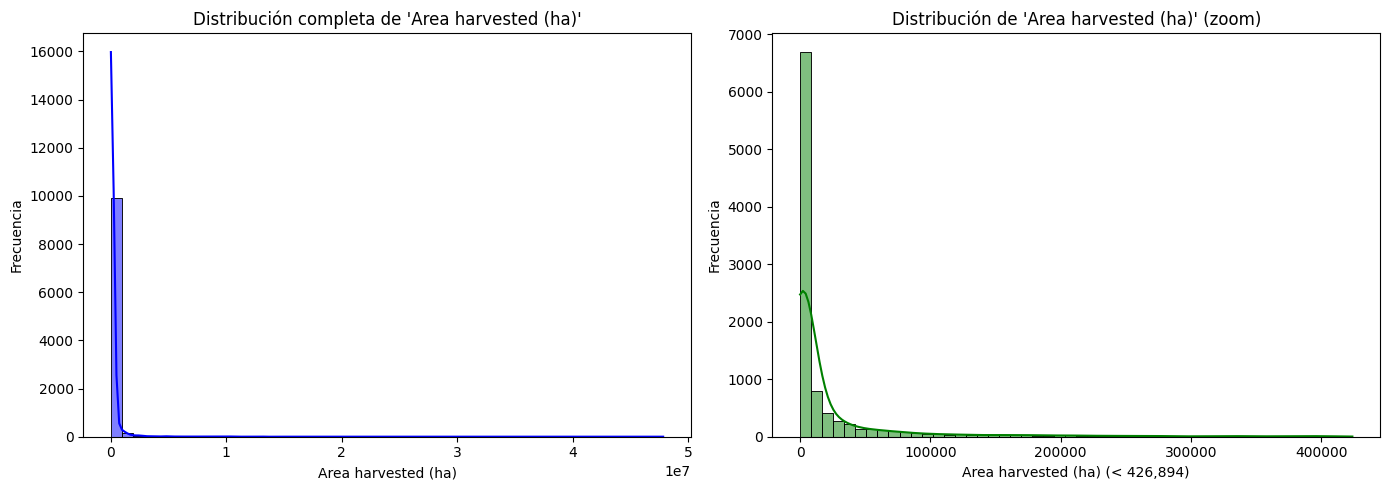

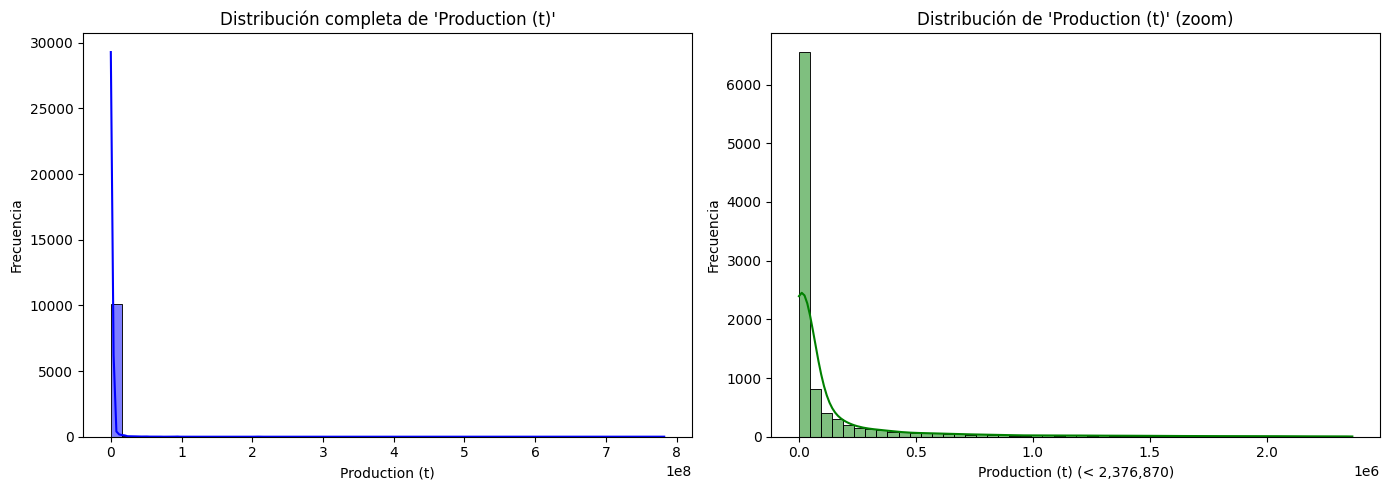

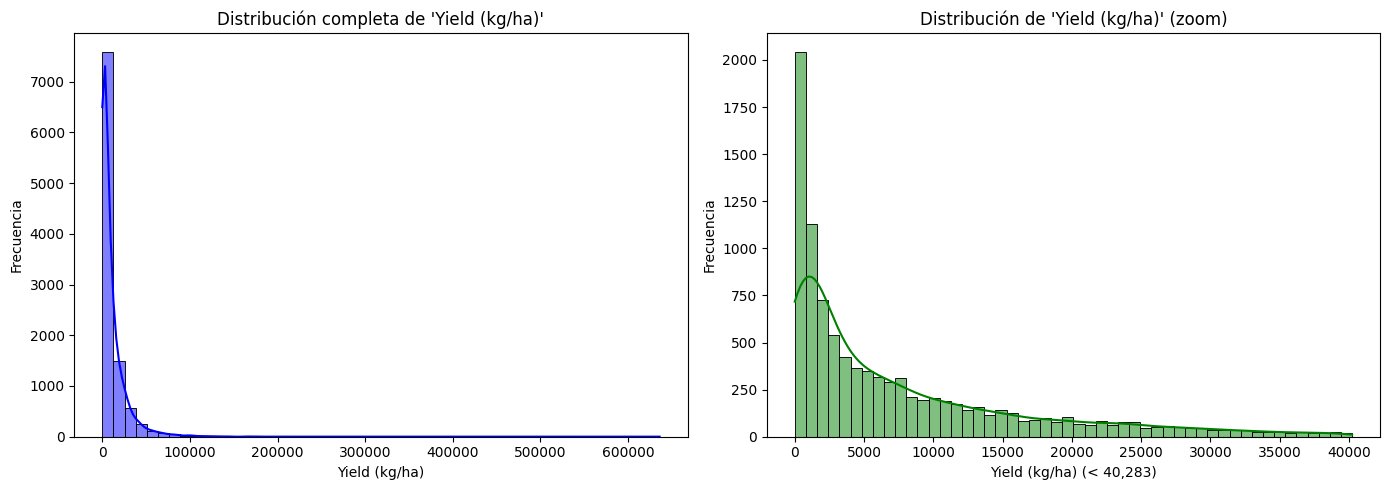

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_full_and_zoom(df, col, zoom_max=None, bins=50):
    x = df[col].dropna()
    if zoom_max is None:
        zoom_max = np.percentile(x, 95)  # zoom automático

    plt.figure(figsize=(14,5))

    # 1) Histograma completo
    plt.subplot(1,2,1)
    sns.histplot(x, bins=bins, kde=True, color='blue')
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.title(f"Distribución completa de '{col}'")

    # 2) Histograma con zoom
    plt.subplot(1,2,2)
    sns.histplot(x[x < zoom_max], bins=bins, kde=True, color='green')
    plt.xlabel(f"{col} (< {zoom_max:,.0f})")
    plt.ylabel("Frecuencia")
    plt.title(f"Distribución de '{col}' (zoom)")

    plt.tight_layout()
    plt.show()

# === Llamadas para las tres variables numéricas ===
plot_full_and_zoom(df_final, 'Area harvested (ha)')   # zoom por p95
plot_full_and_zoom(df_final, 'Production (t)')        # zoom por p95
plot_full_and_zoom(df_final, 'Yield (kg/ha)')         # zoom por p95


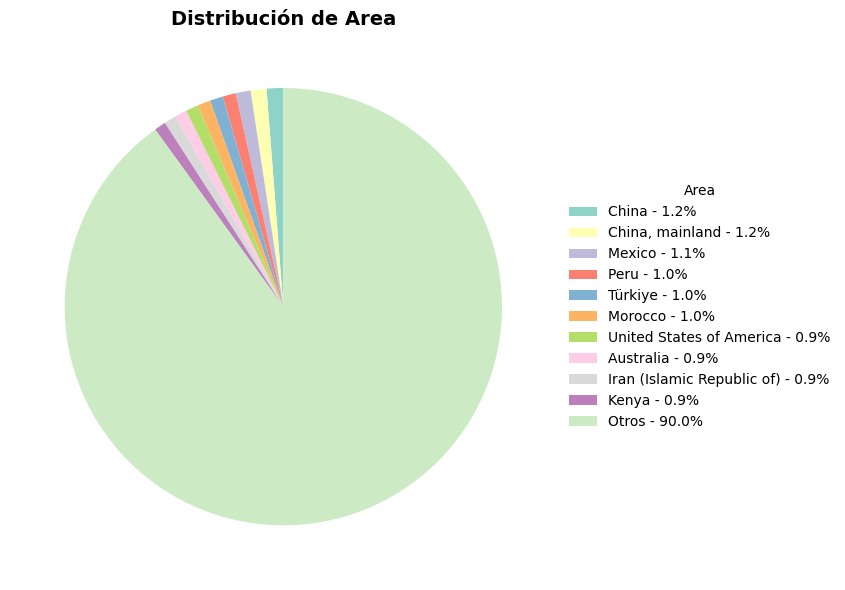

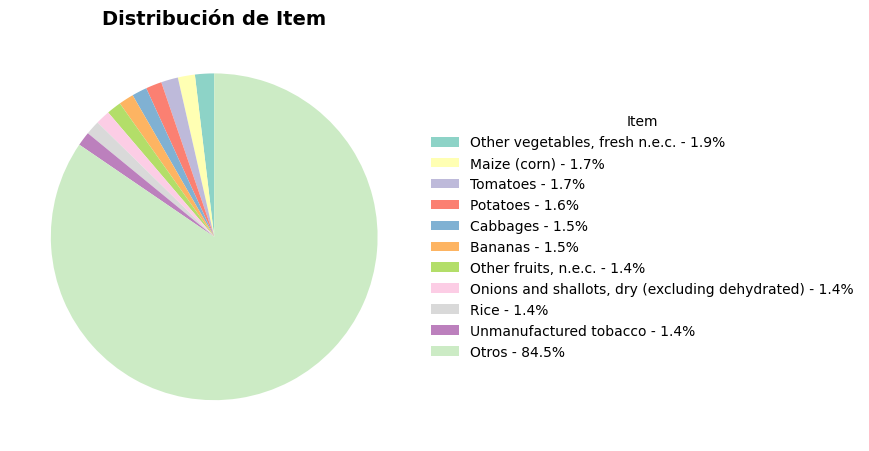

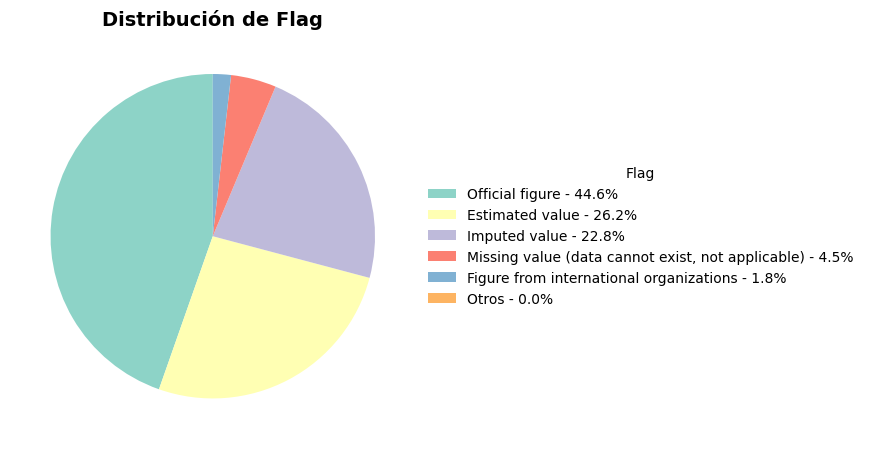

In [ ]:
# Variables categóricas del nuevo dataset
categorical_columns = ['Area', 'Item', 'Flag']

for column in categorical_columns:
    # Contar las frecuencias
    value_counts = df_final[column].value_counts()

    # Seleccionar los 10 más grandes
    top_10 = value_counts.nlargest(10)

    # Agrupar el resto de los valores en "Otros"
    others = value_counts.iloc[10:].sum()
    data = pd.concat([top_10, pd.Series({'Otros': others})])

    # Calcular porcentajes
    percentages = data / data.sum() * 100

    # Crear gráfico de torta
    plt.figure(figsize=(8, 6))
    colors = plt.cm.Set3.colors  # paleta amigable
    ax = data.plot(kind='pie', startangle=90, colors=colors, labels=None)

    # Crear leyenda con nombre + porcentaje
    legend_labels = [f'{label} - {percentage:.1f}%' for label, percentage in zip(data.index, percentages)]
    plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), title=column, frameon=False)

    # Ajustes visuales
    plt.title(f'Distribución de {column}', fontsize=14, weight='bold')
    plt.ylabel('')  # quitar etiqueta de eje y
    plt.tight_layout()

    # Guardar el gráfico como archivo PNG
    plt.savefig(f'{column}_torta.png', bbox_inches='tight')  # Guarda la figura

    # Mostrar
    plt.show()
    print("\n")


# 5. **Definir la tarea**

Después de la limpieza y reestructuración del dataset, ahora contamos con un conjunto de variables que nos permiten plantear un problema de **aprendizaje supervisado**.  

Las **variables predictoras (X)** serán:  
- **Area harvested (ha):** superficie cosechada en hectáreas.  
- **Production (t):** producción total en toneladas.  
- **Yield (kg/ha):** rendimiento por hectárea.  
- **Item:** tipo de cultivo (ejemplo: arroz, maíz, trigo).  

La **variable objetivo (y)** será:  
- **Area:** el país al que pertenece el registro.  

Esto significa que la tarea a resolver se define como un **problema de clasificación multiclase**, donde el objetivo es **predecir a qué país corresponde un registro agrícola** a partir de sus características productivas y del cultivo al que hace referencia.  

Se decidió incluir la variable categórica **Item** porque cada cultivo tiene patrones de producción diferentes. De esta forma, el modelo no solo compara países por magnitudes numéricas, sino también por el tipo de cultivo, lo que hace que la clasificación sea más precisa y realista.  

En conclusión, nuestro proyecto abordará la tarea de **clasificación de países productores de cultivos agrícolas**, utilizando como entradas tanto las variables numéricas de producción como el tipo de cultivo. Esto nos permitirá capturar mejor la diversidad de contextos agrícolas y facilitar una interpretación más completa de los resultados.  